In [10]:
import csv
import numpy as np
import tensorflow as tf
from google.colab import files
from decimal import Decimal

In [2]:
## Uploade files
uploaded=files.upload()


Saving test_dataset.csv to test_dataset.csv
Saving train_dataset.csv to train_dataset.csv


In [3]:
## Get the number of rows in .csv file
def len_data(filename):
  i=0
  with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
              i+=1
  return i

In [22]:
## Get the numpy tensor of the data for training
def get_train_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        temp_data = []
        temp_labels = []
        j = 0
        for row in csv_reader:
            if row[0]=="Area":
              row = False   
            else:
              ## Manipulate data to spread properly
              row[4] = str((Decimal(row[4]) - 1) * 1000)
              row[5] = str((Decimal(row[5])-Decimal(0.75)) * 10000)
              row[8] = str((Decimal(row[8])-Decimal(0.7)) * 10000)
              row[9] = str((1-Decimal(row[9])) * 100000)
              row[10] = str((Decimal(row[10])-Decimal(0.8)) * 1000)
              row[11] = str((Decimal(row[11])-Decimal(0.77)) * 1000)
              row[12] = str(Decimal(row[12]) * 100000)
              row[13] = str(Decimal(row[13]) * 100000)
              row[14] = str(Decimal(row[14]) * 1000)
              row[15] = str((1-Decimal(row[15])) * 1000000)

              ## Get data from a single row and add the data to the list
              bean_data = row[0:16]
              temp_data.append(bean_data)

              ## Get labels corresponding to each class
              if row[16]=="CALI":
                temp_labels.append("0")
              elif row[16]=="SIRA":
                temp_labels.append("1")
              elif row[16]=="HOROZ":
                temp_labels.append("2")
              elif row[16]=="BARBUNYA":
                temp_labels.append("3")
              elif row[16]=="DERMASON":
               temp_labels.append("4")
              elif row[16]=="SEKER":
                temp_labels.append("5")
              else: 
                temp_labels.append("6")

        ## Convert the list to numpy array with float type
        train_data = np.array(temp_data).astype('float')
        train_labels = np.array(temp_labels).astype('float')
        

    return  train_data, train_labels
## Get the numpy tensor from actual data to train
training_data, training_labels = get_train_data('train_dataset.csv')

## Check the shape of dataset tensor and label type
print(training_data.shape)
print(training_data)
print(training_labels)
print(training_labels.shape)

(2500, 16)
[[69892.          1052.973        389.85577069 ...   117.95478599
    585.50371191  1790.62531492]
 [34584.           704.813        272.44836338 ...   171.01043524
    593.22157057  2160.72048222]
 [72102.          1072.061        377.61673029 ...   133.90402427
    643.80593402  1609.76613481]
 ...
 [81774.          1082.182        400.88468802 ...   126.92782451
    647.86784206  6839.36784107]
 [41619.           741.44         261.1093812  ...   233.78907594
    777.24298062  1611.13566517]
 [50043.           894.418        357.31904411 ...   109.69197261
    499.04663173  8799.16506752]]
[3. 4. 3. ... 0. 5. 2.]
(2500,)


In [25]:
## Split the data for training into data for training and data for validation
leng = len_data('train_dataset.csv') -1
data_val = training_data[int(leng *.92):]
data_trained = training_data[:int(leng *.92)]

label_val = training_labels[int(leng *.92):]
label_trained = training_labels[:int(leng *.92)]

## Convert the dataset list to a numpy tensor
data_val = np.expand_dims(data_val, axis=2)
data_trained = np.expand_dims(data_trained, axis=2)

In [32]:
## Build the model using Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='softplus', input_shape=(16,)),
    tf.keras.layers.Dense(64, activation='softplus'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fitting model
history = model.fit(data_trained, label_trained, epochs=500, validation_data=(data_val, label_val))

Epoch 1/500
72/72 [==============================] - 0s 3ms/step - loss: 516.5917 - accuracy: 0.2218 - val_loss: 72.4237 - val_accuracy: 0.3582
Epoch 2/500
72/72 [==============================] - 0s 2ms/step - loss: 77.3191 - accuracy: 0.3954 - val_loss: 41.7503 - val_accuracy: 0.4378
Epoch 3/500
72/72 [==============================] - 0s 2ms/step - loss: 39.9212 - accuracy: 0.5220 - val_loss: 24.1863 - val_accuracy: 0.6269
Epoch 4/500
72/72 [==============================] - 0s 2ms/step - loss: 31.0322 - accuracy: 0.5855 - val_loss: 15.7636 - val_accuracy: 0.7015
Epoch 5/500
72/72 [==============================] - 0s 2ms/step - loss: 18.9446 - accuracy: 0.6642 - val_loss: 15.7712 - val_accuracy: 0.7114
Epoch 6/500
72/72 [==============================] - 0s 2ms/step - loss: 22.0800 - accuracy: 0.6520 - val_loss: 22.9572 - val_accuracy: 0.6667
Epoch 7/500
72/72 [==============================] - 0s 2ms/step - loss: 18.1511 - accuracy: 0.6877 - val_loss: 24.3819 - val_accuracy: 0.661

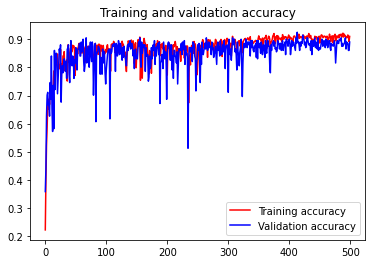

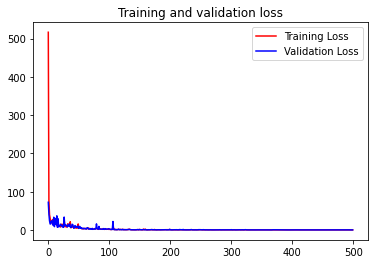

In [33]:
## Model analysis
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
## Save the model as keras model file
model.save('bean_classification_update3.h5')
files.download('bean_classification_update3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>